In [1]:
import numpy as np
from scipy.optimize import linprog

beam1.png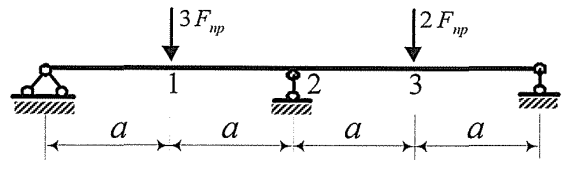

Номера переменных:

1. $R_A$
1. $M_B$
1. $R_C$
1. $M_C$
1. $M_D$
1. $R_E$
1. $F$



Уравнения равновесия:

$\Sigma Fy = 0$; $R_A + R_C + R_E - 5 F = 0$ (1)

$\Sigma m_A = 0$; $ 3 F \cdot 1 - R_C \cdot 2 + 2 F \cdot 3 - R_E \cdot 4 = 0 $ (2)

$\Sigma m_E = 0$; $ R_A \cdot 4 - 3 F \cdot 3 + R_C \cdot 2 - 2 F \cdot 1= 0 $ (3)


Уравнения для внутренних моментов:

$M_B = R_A \cdot 1$

$M_C = R_A \cdot 2 - 3 F \cdot 1$

$M_D = - R_E \cdot 1$

Уравнения статически допустимого состояния:

$ |M_B| \le M_{пр} $

$ |M_C| \le M_{пр} $

$ |M_D| \le M_{пр} $


Целевая функция:

$F \rightarrow max$

In [8]:
# уравнения равновесия. равенства
stat_eq1 = [1,0, 1,  0,0, 1,  -5]
stat_eq2 = [0,0,-2,  0,0,-4,   9]
stat_eq3 = [4,0, 2,  0,0, 0, -11]


# Уравнения для внутренних моментов. равенства
m_eq1 = [-1,1,0, 0,0,0, 0]
m_eq2 = [-2,0,0, 1,0,0, 3]
m_eq3 = [ 0,0,0, 0,1,1, 0]

# коэффициенты при неизветсных в целевой функции
opt_fun = [0,0,0, 0,0,0, -1]  # -1, ибо функция -> max

# ограничение предельного момента
absM = 300  # вычисляется Wпр = sigma_Т * W; (см. лекцию 1)

# ограничение для сил
absF = 10000  # задаётся заведомо недостиживое значение

In [9]:
linprog( opt_fun, A_eq = [stat_eq1, 
                         stat_eq2, 
                         stat_eq3, 
                         m_eq1,
                         m_eq2,
                         m_eq3], 
        b_eq = [0]*6,  # правые части для равенств 
        bounds=( (-absF, absF),(-absM, absM),(-absF, absF),
                 (-absM, absM),(-absM, absM),(-absF, absF),
                 (-absF, absF)),
        method = 'interior-point' )

/usr/local/lib/python3.6/dist-packages/scipy/optimize/_linprog_ip.py:643: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  warn(redundancy_warning, OptimizeWarning)


     con: array([-1.50673695e-05,  2.26011525e-05, -3.76683256e-05, -7.30835336e-06,
        7.75894421e-06,  7.75891769e-06])
     fun: -299.9999915956887
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 299.9999913 ,  299.99999861, 1049.99999002, -299.99999995,
       -149.99999949,  149.99999173,  299.9999916 ])

Ответ:

x: array([ 299.9999913 ,  299.99999861, 1049.99999002, -299.99999995,
       -149.99999949,  149.99999173,  299.9999916 ])
       
1. $R_A$ = 299.9999913
1. $M_B$ = 299.99999861
1. $R_C$ = 1049.99999002
1. $M_C$ = -299.99999995
1. $M_D$ = -149.99999949
1. $R_E$ = 149.99999173
1. $F$   = 299.9999916


#### Контроль корректности решения:
- success: True
- В этой схеме возникает 2 пластических шарнира, значит только два момента должны иметь предельное значение (см. выше absM)

#### Где возникают пластические шарниры?
точки: B и C